**Imports**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

import pickle

import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,BaggingRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

**Loading Data**

In [3]:
df = pd.read_csv('../data/attackingRegressionFIFA20data.csv')  

In [4]:
dflr = df.copy()

We want to predict the overall attribute from the rest.

In [5]:
X = dflr.drop(columns = ['overall'])
y = dflr['overall']

Linear models need features to be standardized, i.e 0 mean and 1 SD.

In [6]:
mean = X.mean()
std = X.std()

X = (X - mean) / std

In [7]:
X.describe()

,age,potential,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,dribbling,physic,attacking_crossing,attacking_heading_accuracy,attacking_volleys,skill_curve,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_stamina,power_strength,power_long_shots,mentality_positioning,mentality_penalties,mentality_composure_boxcox,passing_boxcox,mentality_vision_boxcox,value_eur_boxcox,wage_eur_boxcox,skill_fk_accuracy_boxcox,defending_boxcox,mentality_aggression_boxcox,defending_marking_boxcox,mentality_interceptions_boxcox,defending_standing_tackle_boxcox,pca_0,pca_1,position1_RW position2_ LW,position1_LW,position1_LW position2_ RW,position2_ LW,position1_LW preferred_foot_Right,position1_RW preferred_foot_Left,position1_RW,position2_ LW preferred_foot_Right,position2_ ST,position1_ST preferred_foot_Right,position1_ST,position1_ST position2_NA,position2_NA preferred_foot_Right,position2_NA
count,1.415000e+03,1.415000e+03,1.415000e+03,1415.000000,1.415000e+03,1.415000e+03,1415.000000,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1415.000000,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1415.000000,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03,1.415000e+03
mean,-2.008601e-17,9.239566e-16,6.226664e-16,0.000000,4.017203e-16,-8.034405e-17,0.000000,8.034405e-17,2.008601e-16,3.615482e-16,1.205161e-16,2.410322e-16,3.213762e-16,1.606881e-16,-1.606881e-16,2.209462e-16,2.410322e-16,-2.410322e-16,-8.034405e-17,8.034405e-17,0.000000,-3.213762e-16,-1.807741e-16,1.632591e-13,5.142020e-14,8.781605e-14,-1.470296e-14,4.117633e-14,1.187485e-13,-1.111560e-13,5.845030e-15,-6.246750e-15,9.721631e-15,5.642161e-14,-4.017203e-17,-8.034405e-17,-1.004301e-17,0.000000,-6.025804e-17,-3.012902e-17,-1.004301e-17,-6.025804e-17,3.012902e-17,-4.519353e-17,-5.523654e-17,8.034405e-17,1.305591e-16,9.038706e-17,3.012902e-17,1.104731e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.673086e+00,-2.670682e+00,-1.237445e-01,-3.327633,-8.768113e-01,-7.596528e-01,-3.660768,-2.814684e+00,-2.439413e+00,-2.702128e+00,-2.196989e+00,-3.101374e+00,-2.385612e+00,-2.407429e+00,-2.330274e+00,-3.475140e+00,-3.114279e+00,-3.047936e+00,-2.847266e+00,-2.578554e+00,-3.002689,-2.577544e+00,-4.787022e+00,-3.156821e+00,-2.809793e+00,-3.734610e+00,-1.783179e+00,-9.652264e-01,-3.021006e+00,-2.669906e+00,-2.546884e+00,-2.408769e+00,-2.273156e+00,-2.242685e+00,-2.951727e+00,-3.372869e+00,-2.228635e-01,-0.414977,-2.228635e-01,-3.193005e-01,-3.312496e-01,-2.157886e-01,-3.996537e-01,-2.741802e-01,-2.280523e-01,-1.210009e+00,-1.478307e+00,-1.190714e+00,-1.282068e+00,-1.720898e+00
25%,-1.056089e+00,-6.692618e-01,-1.237445e-01,0.005890,-8.768113e-01,-7.596528e-01,-0.630619,-6.494247e-01,-6.822126e-01,-7.113708e-01,-9.052269e-01,-7.030650e-01,-7.636825e-01,-6.831366e-01,-7.700340e-01,-7.256487e-01,-6.635163e-01,-6.396233e-01,-6.166494e-01,-7.031214e-01,-0.660201,-7.172846e-01,-5.967120e-01,-7.978925e-01,-7.640964e-01,-6.389424e-01,-7.145158e-01,-9.652264e-01,-7.641946e-01,-8.265912e-01,-8.919960e-01,

**Modeling**

We're going to be using K-Fold cross validation to test our models. This means, we split the data into k (=10 here) folds, and train on k-1 and validate on the other fold. Since we do not have that many players, or data points, the standard train-test split might've led us to less generalizability, so it wasn't a goof choice for validation here.

In [8]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = scorer, cv = kfold))
    return(rmse)

def r2_cv(model):
    r2= cross_val_score(model, X, y, scoring = 'r2', cv = kfold)
    return(r2)


We're going to keep the predictions from every model. This will come in handy later.

In [9]:
predictions = []

**Linear Approaches**

Let's start off with the simple statistical approach, Ordinary Least Squares Linear Regression. Multivariate, here.

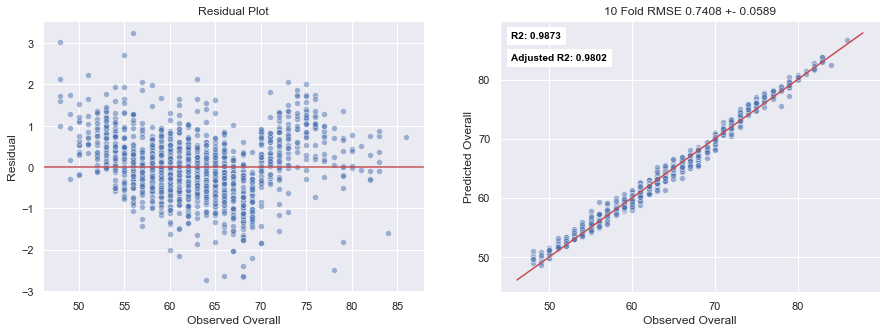

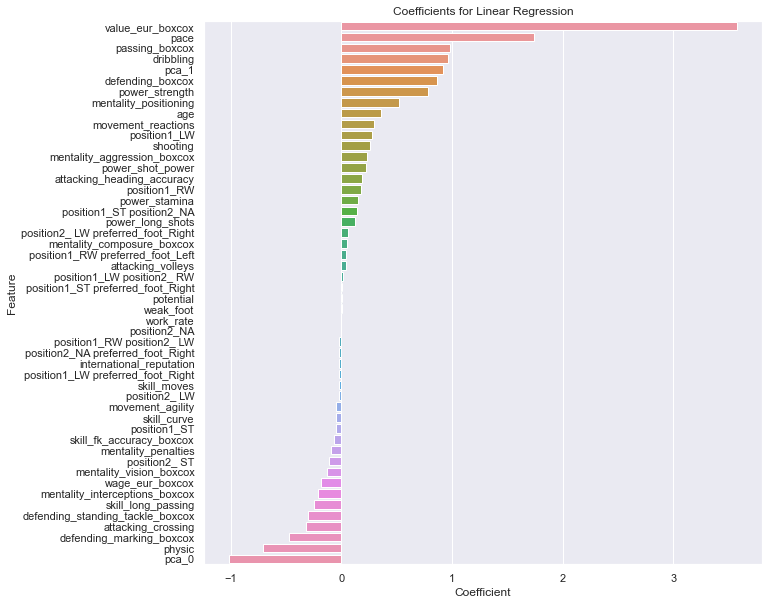

In [10]:
lr = LinearRegression()
lr.fit(X, y)


error = rmse_cv(lr)
r2 = r2_cv(lr).mean()
y_pred = cross_val_predict(lr, X, y, cv=kfold)
predictions.append(('Linear Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Coefficient': lr.coef_ , 'Feature': X.columns }).sort_values('Coefficient', ascending = False)

sns.barplot(x='Coefficient', y = 'Feature', data = coefdf).set_title("Coefficients for Linear Regression")
plt.show()

The coefficient for each feature shows how much the overall attribute, the target, increases with a unit increase in the feature. For example, we can see that our transformed feature value_eur_boxcox, on an increase of one causes around 3.5 increase in overall. This feature that we worked on to clean previously contributes so much to the predictive power of the model, a clear indicator as to how important data preparation was.

The residual plot, however is a little worrying, See the non uniform variance and the slight quadratic pattern? We've alleviated this to a great extent by feature engineering, or it'd probably be straight up parabolic or some other weird shape. However, this does show how linear models may not be the best idea for this kind of data.

The Root Mean Squared Error, RMSE is self explanatory. Nice and low values. The R2 measures the goodness of fit of a regression model. However it's not the best metric when we have too many features. We do have quite some, so another measure, the adjusted R2, accounts for that. Pretty nice here too. Not too far off from the ideal 1.

Time to regularize weights to prevent overfitting! Ridge regression or L2 regression tries to penalize the squares of the weights, so they don't get too big and overfit.

Best alpha : 0.08
Try again for more precision with alphas centered around 0.08
Best alpha : 0.076
Try again for even more precision with alphas centered around 0.076
Best alpha : 0.07447999999999999


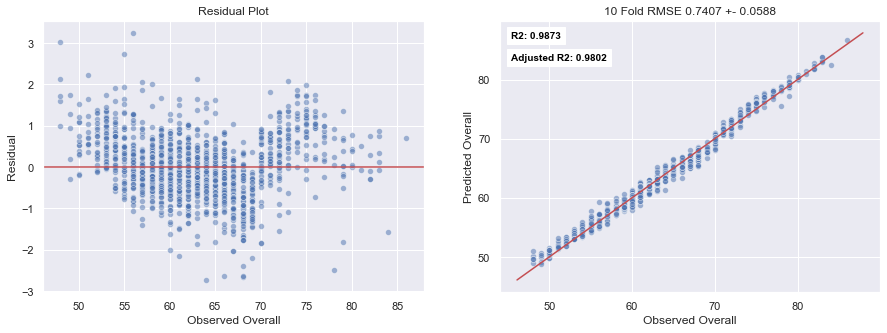

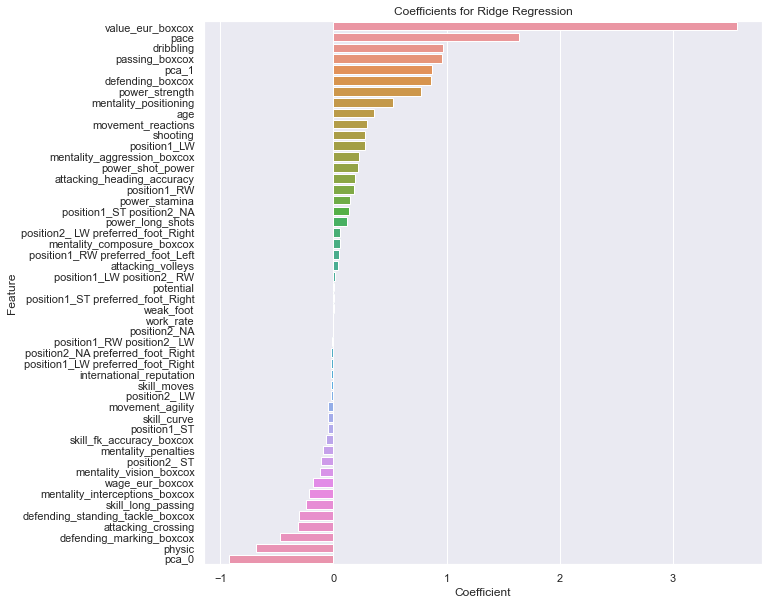

In [11]:
ridge = RidgeCV(alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1], cv=kfold)
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = kfold)
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for even more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .8, alpha * .82, alpha * .84, alpha * .86, alpha * .88,
                          alpha * .9, alpha * .92, alpha * .94, alpha * .96, alpha * .98,
                          alpha * .1, alpha * .102, alpha * .104, alpha * .106, alpha * .108,
                          alpha * .11, alpha * .112, alpha * .114, alpha * .116, alpha * .118, alpha * .12], 
                          cv = kfold)
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)


error = rmse_cv(ridge)
r2 = r2_cv(ridge).mean()
y_pred = cross_val_predict(ridge, X, y, cv=kfold)
predictions.append(('Ridge Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Coefficient': ridge.coef_ , 'Feature': X.columns }).sort_values('Coefficient', ascending = False)

sns.barplot(x='Coefficient', y = 'Feature', data = coefdf).set_title("Coefficients for Ridge Regression")
plt.show()


Pretty similar right? Error's slightly better. Also, check out the coefficients. They've changed (a bit).

Lasso Regression penalizes L1 norms. That is, |w|. In my opinion, this regularization is better. Why? Lasso can even set some useless weights to zero. Feature selection, and weight shrinkage in one? Noice.

Best alpha : 0.0002
Try again for more precision with alphas centered around 0.0002
Best alpha : 0.00028
Try again for even more precision with alphas centered around 0.00028
Best alpha : 0.00027439999999999995


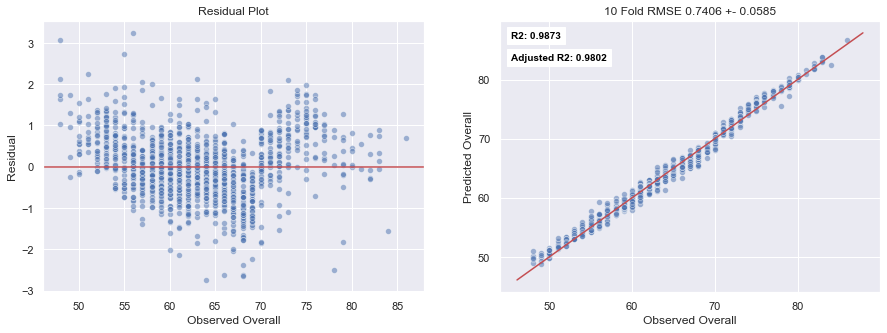

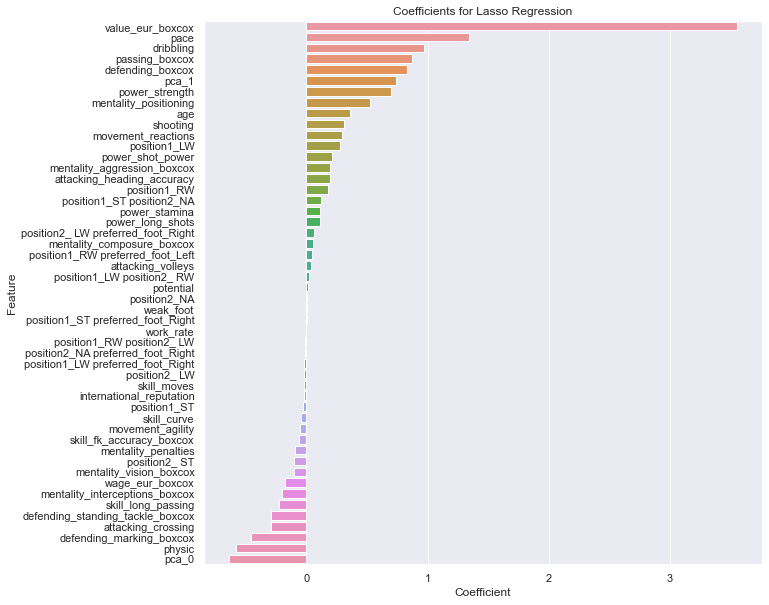

In [12]:
lasso = LassoCV(alphas = [ 2e-4, 2.2e-4, 2.4e-4, 2.6e-4, 2.8e-4, 3e-4, 3.25e-4, 3.5e-4], 
                max_iter = 100000, random_state = 42, cv = kfold)
lasso.fit(X, y)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                          max_iter = 100000, cv = kfold)
lasso.fit(X, y)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for even more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .8, alpha * .82, alpha * .84, alpha * .86, alpha * .88,
                          alpha * .9, alpha * .92, alpha * .94, alpha * .96, alpha * .98,
                          alpha * .1, alpha * .102, alpha * .104, alpha * .106, alpha * .108,
                          alpha * .11, alpha * .112, alpha * .114, alpha * .116, alpha * .118, alpha * .12], 
                          max_iter = 100000, cv = kfold)
lasso.fit(X, y)
alpha = lasso.alpha_
print("Best alpha :", alpha)


error = rmse_cv(lasso)
r2 = r2_cv(lasso).mean()
y_pred = cross_val_predict(lasso, X, y, cv=kfold)
predictions.append(('Lasso Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Coefficient': lasso.coef_ , 'Feature': X.columns }).sort_values('Coefficient', ascending = False)

sns.barplot(x='Coefficient', y = 'Feature', data = coefdf).set_title("Coefficients for Lasso Regression")
plt.show()

OK, I stand corrected. Didn't do much here. A *slight* decrease in error. Hey, I'll take that!

What if Lasso and Ridge had a child? Meet ElasticNet, which uses both L1 and L2 norms.

Best l1_ratio : 0.985
Best alpha : 0.0066174137598497985
Try again for more precision with l1_ratio centered around 0.985
Best l1_ratio : 1
Best alpha : 0.006302298818904574
Now try again for more precision on alpha, with l1_ratio fixed at 1 and alpha centered around 0.006302298818904574
Best l1_ratio : 1
Best alpha : 0.0037813792913427443
Now try again for even more precision on alpha, with l1_ratio fixed at 1 and alpha centered around 0.0037813792913427443
Best l1_ratio : 1
Best alpha : 0.00037813792913427447


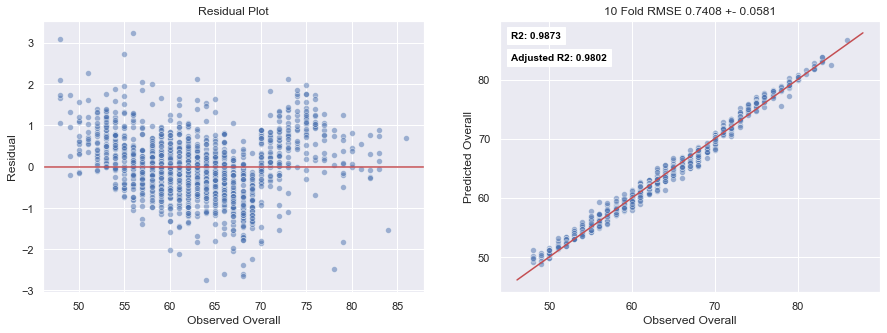

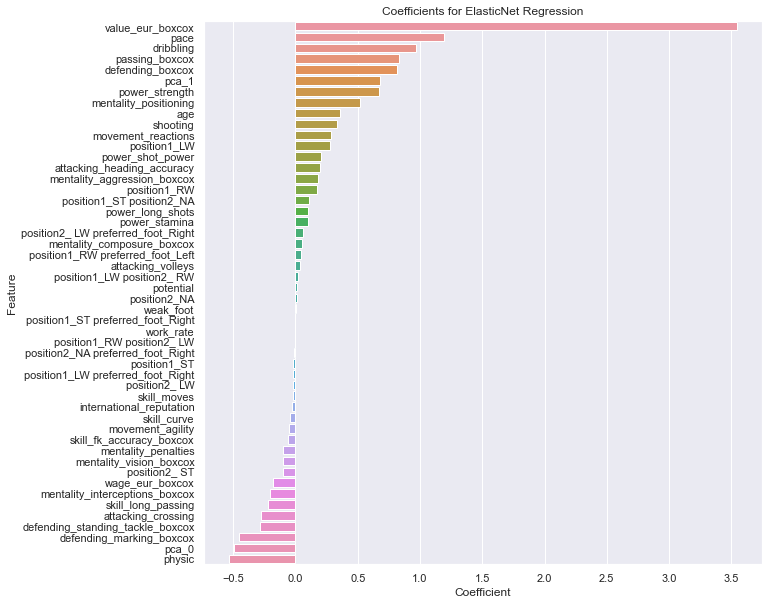

In [13]:
elasticNet = ElasticNetCV(l1_ratio = [0.25, 0.5, 0.85, 0.95, 0.975, 0.98, 0.985],
                          eps = 1e-3, n_alphas = 1000,
                          max_iter = 50000, cv = kfold)
elasticNet.fit(X, y)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05],
                          eps = 1e-3, n_alphas = 1000,
                          max_iter = 50000, cv = kfold)
elasticNet.fit(X, y)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = kfold)
elasticNet.fit(X, y)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for even more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .8, alpha * .82, alpha * .84, alpha * .86, alpha * .88,
                          alpha * .9, alpha * .92, alpha * .94, alpha * .96, alpha * .98,
                          alpha * .1, alpha * .102, alpha * .104, alpha * .106, alpha * .108,
                          alpha * .11, alpha * .112, alpha * .114, alpha * .116, alpha * .118, alpha * .12], 
                          max_iter = 50000, cv = kfold)
elasticNet.fit(X, y)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )


error = rmse_cv(elasticNet)
r2 = r2_cv(elasticNet).mean()
y_pred = cross_val_predict(elasticNet, X, y, cv=kfold)
predictions.append(('ElasticNet Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Coefficient': elasticNet.coef_ , 'Feature': X.columns }).sort_values('Coefficient', ascending = False)

sns.barplot(x='Coefficient', y = 'Feature', data = coefdf).set_title("Coefficients for ElasticNet Regression")
plt.show()

Wow. Too much devilry. That didn't work much. See how the best L1 ratio ended up at 1? This data is suited to Lasso regression over Ridge. Moving on.

Time to use the Support Vector Machine. In brief, this aims to draw a separable line for our data, to divide it into different areas for different regression outputs based on input features. These lines (well, lines because I'm using a linear kernel here) have a margin around them, and Support Vectors themselves are essentially the data points that fall on these margins. SVM finds the maximum margin separating the hyperplane.

Time to go for some exhaustive search over good hyperparameters.

In [25]:
parameters = {
    'kernel' : [ 'linear'],
    'C': [0.6, 0.65, 0.7, 0.8, 0.9, 1],
    'epsilon': [0.6, 0.65, 0.7, 0.75, 0.8],
    'gamma': [7, 10, 15, 20]
    
}

svr = SVR()
clf = GridSearchCV(svr, param_grid = parameters, cv = kfold,scoring='neg_mean_squared_error', n_jobs = -1,  verbose = 10)

clf.fit(X, y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.6, 0.65, 0.7, 0.8, 0.9, 1],
                         'epsilon': [0.6, 0.65, 0.7, 0.75, 0.8],
                         'gamma': [7, 10, 15, 20], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=10)

In [26]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
31,0.596944,0.086258,0.007811,0.010479,0.65,0.7,20,linear,"{'C': 0.65, 'epsilon': 0.7, 'gamma': 20, 'kernel': 'linear'}",-0.551221,-0.598980,-0.470407,-0.730678,-0.734442,-0.471843,-0.477579,-0.503474,-0.571497,-0.514084,-0.562420,0.094407,1
30,0.567679,0.074463,0.017184,0.017743,0.65,0.7,15,linear,"{'C': 0.65, 'epsilon': 0.7, 'gamma': 15, 'kernel': 'linear'}",-0.551221,-0.598980,-0.470407,-0.730678,-0.734442,-0.471843,-0.477579,-0.503474,-0.571497,-0.514084,-0.562420,0.094407,1
29,0.586632,0.073968,0.012996,0.014969,0.65,0.7,10,linear,"{'C': 0.65, 'epsilon': 0.7, 'gamma': 10, 'kernel': 'linear'}",-0.551221,-0.598980,-0.470407,-0.730678,-0.734442,-0.471843,-0.477579,-0.503474,-0.571497,-0.514084,-0.562420,0.094407,1
28,0.594096,0.058012,0.012529,0.013623,0.65,0.7,7,linear,"{'C': 0.65, 'epsilon': 0.7, 'gamma': 7, 'kernel': 'linear'}",-0.551221,-0.598980,-0.470407,-0.730678,-0.734442,-0.471843,-0.477579,-0.503474,-0.571497,-0.514084,-0.562420,0.094407,1
48,0.648284,0.053774,0.012498,0.009373,0.7,0.7,7,linear,"{'C': 0.7, 'epsilon': 0.7, 'gamma': 7, 'kernel': 'linear'}",-0.551587,-0.598682,-0.469654,-0.731586,-0.734460,-0.473725,-0.477160,-0.505934,-0.569445,-0.513976,-0.562621,0.094327,5
50,0.653714,0.069144,0.010935,0.012201,0.7,0.7,15,linear,"{'C': 0.7, 'epsilon': 0.7, 'gamma': 15, 'kernel': 'linear'}",-0.551587,-0.598682,-0.469654,-0.731586,-0.734460,-0.473725,-0.477160,-0.505934,-0.569445,-0.513976,-0.562621,0.094327,5
51,0.657657,0.041595,0.009374,0.007654,0.7,0.7,20,linear,"{'C': 0.7, 'epsilon': 0.7, 'gamma': 20, 'kernel': 'linear'}",-0.551587,-0.598682,-0.469654,-0.731586,-0.734460,-0.473725,-0.477160,-0.505934,-0.569445,-0.513976,-0.562621,0.094327,5
49,0.623291,0.057798,0.007811,0.010480,0.7,0.7,10,linear,"{'C': 0.7, 'epsilon': 0.7, 'gamma': 10, 'kernel': 'linear'}",-0.551587,-0.598682,-0.469654,-0.731586,-0.734460,-0.473725,-0.477160,-0.505934,-0.569445,-0.513976,-0.562621,0.094327,5
113,0.782513,0.122883,0.010936,0.012201,1,0.75,10,linear,"{'C': 1, 'epsilon': 0.75, 'gamma': 10, 'kernel': 'linear'}",-0.550481,-0.604125,-0.466090,-0.717977,-0.720609,-0.476323,-0.491662,-0.514290,-0.565960,-0.520023,-0.562754,0.087709,9
114,0.769721,0.092181,0.007811,0.010479,1,0.75,15,linear,"{'C': 1, 'epsilon': 0.75, 'gamma': 15, 'kernel': 'linear'}",-0.550481,-0.604125,-0.466090,-0.717977,-0.720609,-0.476323,-0.491662,-0.514290,-0.565960,-0.520023,-0.562754,0.087709,9


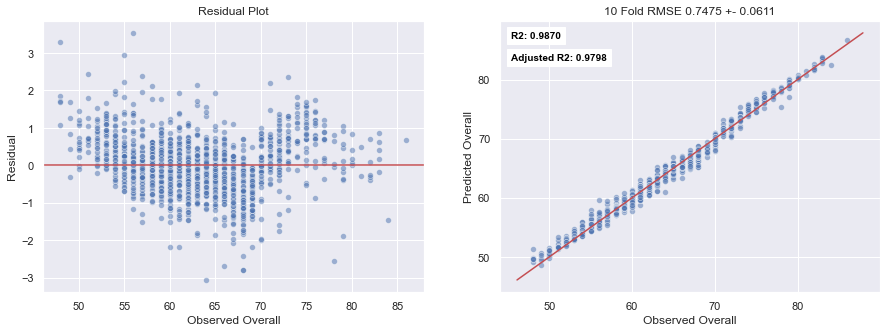

In [14]:
svr = SVR(C = 0.65, epsilon = 0.7, gamma = 7, kernel = 'linear')
svr.fit(X, y)

error = rmse_cv(svr)
r2 = r2_cv(svr).mean()
y_pred = cross_val_predict(svr, X, y, cv=kfold)
predictions.append(('Support Vector Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()




The error and residuals did not end up looking too different from the previous methods. Fallacy of linear approaches?

**Bagging Linear Approaches**

Bagging, or bootstrap aggregating, is an ensemble model. A number of models are trained, each on a subset of data sampled from the entire dataset. At the end, they're all averaged. This reduces the inherent variance in machine learning. Also, different subsets may come up with different conculsions that are generalizable, and without bagging might have been overfitted.

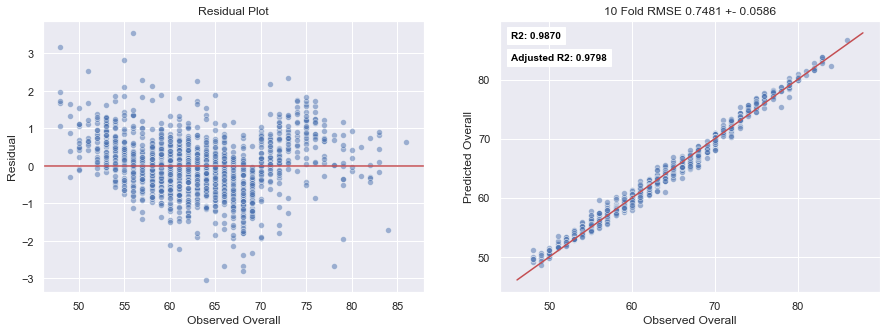

In [15]:
svrb = SVR(C = 0.65, epsilon = 0.7, gamma = 7, kernel = 'linear')

bagsvr = BaggingRegressor(base_estimator=svrb,n_estimators=25, random_state=42)

bagsvr.fit(X, y)

error = rmse_cv(bagsvr)
r2 = r2_cv(bagsvr).mean()
y_pred = cross_val_predict(bagsvr, X, y, cv=kfold)
predictions.append(('Bagging Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()


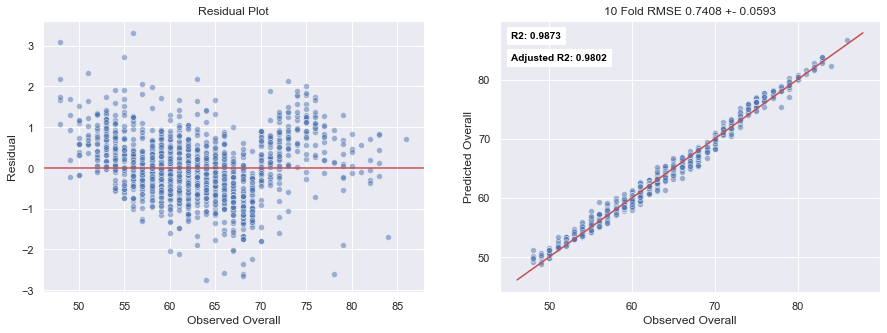

In [16]:
lassob = Lasso(alpha = 0.0002744)

baglasso = BaggingRegressor(base_estimator=lassob,n_estimators=25, random_state=42)

baglasso.fit(X, y)

error = rmse_cv(baglasso)
r2 = r2_cv(baglasso).mean()
y_pred = cross_val_predict(baglasso, X, y, cv=kfold)
predictions.append(('Bagging Lasso Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

Sadly, none of them seemed to help over non-bagging approaches. The hyperparameters probably have to be tuned.

**Tree Based Approaches**

Tree based approaches use delightful concepts from statistics to grow a tree which is separated at each level into children based on a measures from statistics and from information theory. These are where statistical modeling really shines through.

The decison tree is the vanilla model, the simplest of these.

In [55]:
parameters = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
    
}

dt = DecisionTreeRegressor(random_state = 42)
clf = RandomizedSearchCV(dt, param_distributions = parameters, cv = kfold ,scoring='neg_mean_squared_error', n_jobs = -1,\
                   random_state = 42, n_iter = 1000, verbose = 10)

clf.fit(X, y)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1999s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1960s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:    9.1s
[Parallel(n_jo

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=42,
                             

In [56]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
78,0.028118,0.006249,0.000000,0.000000,2,4,auto,90,"{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 90}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1
15,0.028118,0.009373,0.001562,0.004687,2,4,auto,20,"{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1
42,0.031066,0.008024,0.002160,0.004596,2,4,auto,50,"{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1
61,0.031242,0.000001,0.000000,0.000000,5,4,auto,70,"{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1
69,0.023432,0.007811,0.006249,0.007653,2,4,auto,80,"{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1
70,0.026556,0.007159,0.001562,0.004687,5,4,auto,80,"{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1
34,0.026525,0.007138,0.001662,0.004662,5,4,auto,40,"{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1
33,0.029681,0.004686,0.000000,0.000000,2,4,auto,40,"{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1
60,0.026557,0.007159,0.001562,0.004686,2,4,auto,70,"{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1
25,0.026557,0.007159,0.004686,0.007159,5,4,auto,30,"{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30}",-0.258038,-0.195203,-0.161704,-0.166397,-0.227121,-0.350247,-0.223726,-0.201791,-0.238198,-0.178071,-0.220050,0.052710,1


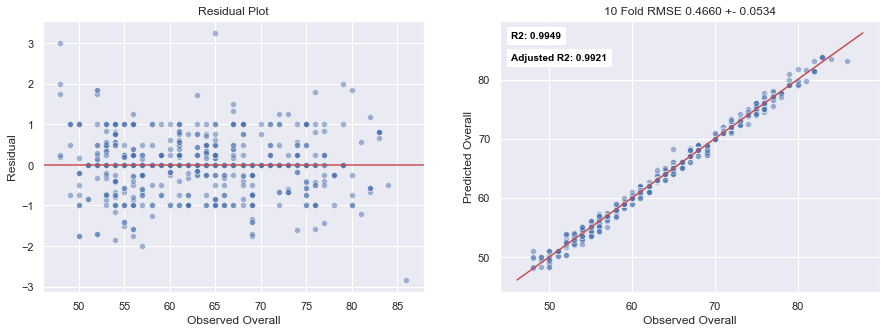

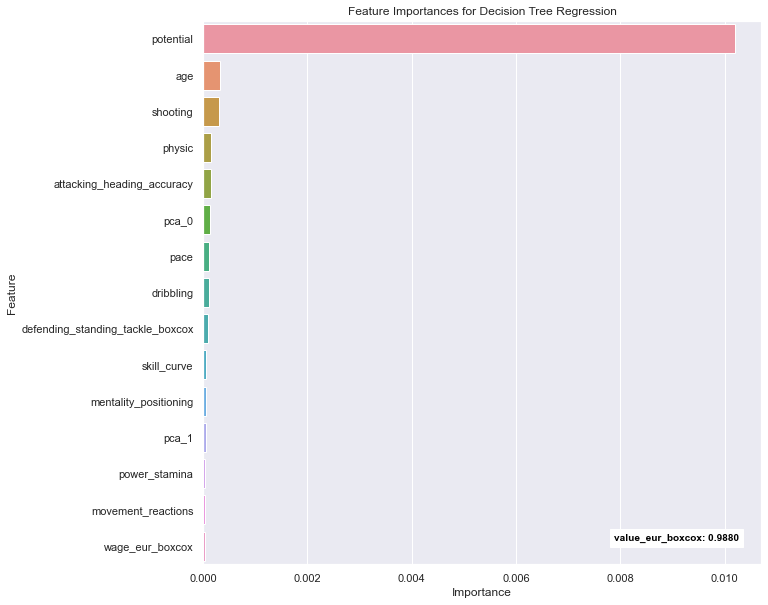

In [17]:
dt = DecisionTreeRegressor(min_samples_split = 2, min_samples_leaf = 4,\
                           max_features = 'auto', max_depth = 50, random_state = 42)
dt.fit(X, y)

error = rmse_cv(dt)
r2 = r2_cv(dt).mean()
y_pred = cross_val_predict(dt, X, y, cv=kfold)
predictions.append(('Decision Tree Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Importance': dt.feature_importances_ , 'Feature': X.columns }).sort_values('Importance', ascending = False)
value_eur_boxcox = coefdf.head(1)['Importance'].values
coefdf.drop(coefdf.head(1).index, inplace = True)

sns.barplot(x='Importance', y = 'Feature', data = coefdf.head(15)).set_title("Feature Importances for Decision Tree Regression")
ax.text(x=0.96, y=0.04, transform=ax.transAxes, s="value_eur_boxcox: %.4f" % value_eur_boxcox,\
    fontweight='demibold', fontsize=10, va='bottom', ha='right',\
    backgroundcolor='white', color='black')
plt.show()

Feature importances are a measure of how useful a feature actually is for predictions. See the val_eur_boxcox? I've removed that from the barplot because it actual gave an astounding 98.8% importance, a major success in our feature engineering!

See how much lower the error is? We should recognize however, that decision trees are prone to overfitting. Random forests are very popular as ensembles of decision trees, through both bootstrapping at the data point, and also at the feature level.

In [73]:
parameters = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2,3, 5,7,10],
 'n_estimators': [200]
    
}

rf = RandomForestRegressor()
clf = RandomizedSearchCV(rf, param_distributions = parameters, cv = kfold ,scoring='neg_mean_squared_error', n_jobs = -1,\
                   random_state = 42, n_iter = 5000, verbose = 10)

clf.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0...
                                

In [74]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
15,5.389175,0.134112,0.035767,0.018460,200,2,2,auto,20,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20}",-0.137195,-0.122377,-0.123443,-0.121777,-0.169438,-0.273851,-0.116545,-0.109227,-0.151836,-0.161105,-0.148679,0.045866,1
75,5.445147,0.080360,0.038767,0.014271,200,2,2,auto,80,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 80}",-0.131584,-0.119697,-0.125441,-0.124666,-0.166803,-0.275358,-0.115705,-0.108045,-0.156426,-0.164281,-0.148800,0.046547,2
65,5.344056,0.092798,0.031242,0.012099,200,2,2,auto,70,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70}",-0.135809,-0.126813,-0.124750,-0.121123,-0.164250,-0.271637,-0.121240,-0.103003,-0.152417,-0.168317,-0.148936,0.045360,3
87,5.812691,0.342101,0.042178,0.015698,200,5,2,auto,90,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90}",-0.131096,-0.124156,-0.130167,-0.123291,-0.163814,-0.267100,-0.122168,-0.103334,-0.160815,-0.163419,-0.148936,0.043901,4
66,5.345618,0.107048,0.029681,0.014737,200,3,2,auto,70,"{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70}",-0.136369,-0.116499,-0.130564,-0.129869,-0.168123,-0.270009,-0.117398,-0.106355,-0.151286,-0.164373,-0.149085,0.044709,5
16,5.359676,0.138220,0.031243,0.017112,200,3,2,auto,20,"{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20}",-0.137426,-0.123357,-0.122119,-0.121407,-0.167692,-0.275349,-0.114805,-0.108193,-0.150833,-0.170228,-0.149141,0.046773,6
57,5.351977,0.260228,0.029681,0.016309,200,5,2,auto,60,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60}",-0.134106,-0.119526,-0.126793,-0.120453,-0.171208,-0.287659,-0.115831,-0.105467,-0.148329,-0.163373,-0.149275,0.050319,7
30,5.539452,0.090331,0.035929,0.017183,200,2,1,auto,40,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40}",-0.137834,-0.120049,-0.124255,-0.120340,-0.166285,-0.268938,-0.118172,-0.109776,-0.156599,-0.170581,-0.149283,0.044824,8
85,5.398730,0.082424,0.042178,0.018549,200,2,2,auto,90,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90}",-0.139603,-0.122196,-0.125411,-0.126303,-0.169348,-0.280902,-0.116406,-0.109162,-0.150537,-0.153934,-0.149380,0.047292,9
5,5.319484,0.141023,0.039055,0.016007,200,2,2,auto,10,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}",-0.136097,-0.128591,-0.124483,-0.127720,-0.169405,-0.271054,-0.115146,-0.104122,-0.152663,-0.165031,-0.149431,0.045143,10


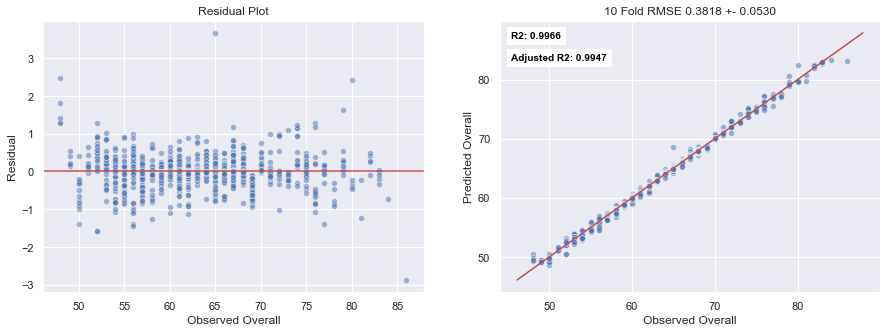

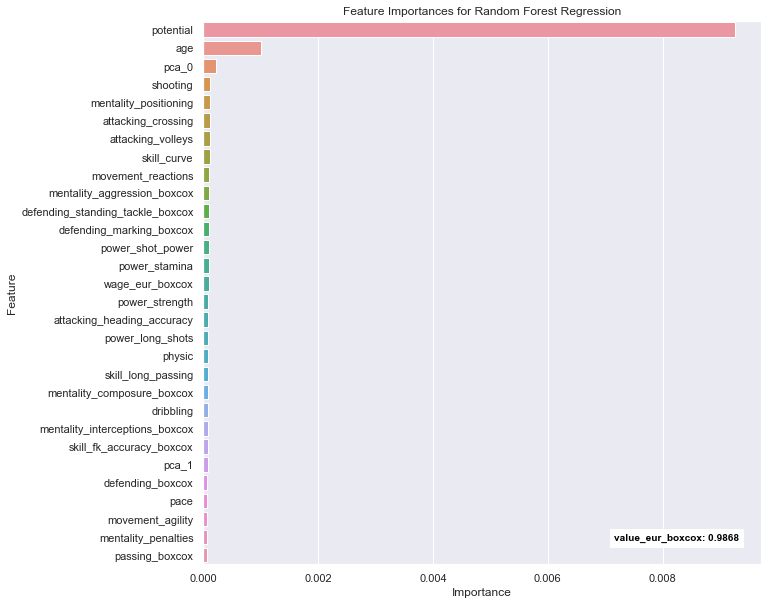

In [18]:
rf = RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2,\
                           max_features = 'auto', max_depth = 20, random_state = 42, n_jobs = -1)
rf.fit(X, y)

error = rmse_cv(rf)
r2 = r2_cv(rf).mean()
y_pred = cross_val_predict(rf, X, y, cv=kfold)
predictions.append(('Random Forest Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Importance': rf.feature_importances_ , 'Feature': X.columns }).sort_values('Importance', ascending = False)
value_eur_boxcox = coefdf.head(1)['Importance'].values
coefdf.drop(coefdf.head(1).index, inplace = True)

sns.barplot(x='Importance', y = 'Feature', data = coefdf.head(30)).set_title("Feature Importances for Random Forest Regression")
ax.text(x=0.96, y=0.04, transform=ax.transAxes, s="value_eur_boxcox: %.4f" % value_eur_boxcox,\
    fontweight='demibold', fontsize=10, va='bottom', ha='right',\
    backgroundcolor='white', color='black')
plt.show()

Here we go. A much lower error, and feature importances have adjusted to account for more features, though it's still dominated by the engineered boxcox feature.

Extremely Randomized Trees are similar to random forests but do not use the best split based on a measure, but a random split. Also, bootstrapping is not used, but they are an ensemble model.

In [102]:
parameters = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2,3, 5,7,10],
 'n_estimators': [200]
    
}

ext = ExtraTreesRegressor()
clf = RandomizedSearchCV(ext, param_distributions = parameters, cv = kfold ,scoring='neg_mean_squared_error', n_jobs = -1,\
                   random_state = 42, n_iter = 5000, verbose = 10)

clf.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0....
                                                 random_state=None, verbose=0,
                        

In [103]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
81,3.697392,0.113821,0.046864,0.009880,200,3,1,auto,90,"{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90}",-0.164311,-0.150162,-0.128017,-0.144867,-0.206367,-0.299454,-0.186102,-0.148751,-0.193618,-0.191720,-0.181337,0.046213,1
40,3.755365,0.050474,0.035929,0.022147,200,2,1,auto,50,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50}",-0.154884,-0.151942,-0.135031,-0.152118,-0.216458,-0.300159,-0.188934,-0.136391,-0.201808,-0.183222,-0.182095,0.047338,2
31,3.826118,0.140622,0.037493,0.015932,200,3,1,auto,40,"{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40}",-0.165870,-0.131891,-0.134123,-0.148409,-0.214350,-0.298566,-0.184095,-0.144068,-0.203561,-0.198574,-0.182351,0.047966,3
21,3.897539,0.284373,0.044103,0.011929,200,3,1,auto,30,"{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}",-0.165046,-0.137487,-0.139600,-0.144259,-0.215487,-0.301099,-0.181192,-0.140553,-0.208532,-0.192376,-0.182563,0.048295,4
10,3.841357,0.095058,0.032051,0.019042,200,2,1,auto,20,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}",-0.172279,-0.143973,-0.134553,-0.157887,-0.233106,-0.297586,-0.177503,-0.138353,-0.177223,-0.195080,-0.182754,0.047391,5
11,3.827780,0.078486,0.035441,0.016306,200,3,1,auto,20,"{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}",-0.176675,-0.140591,-0.138550,-0.151945,-0.217489,-0.294083,-0.175184,-0.134126,-0.203652,-0.195923,-0.182822,0.046207,6
52,3.531982,0.077621,0.034367,0.013618,200,5,1,auto,60,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60}",-0.161386,-0.148203,-0.127930,-0.148416,-0.228392,-0.301113,-0.179552,-0.142383,-0.202415,-0.192113,-0.183190,0.049030,7
41,3.714889,0.061294,0.040616,0.015931,200,3,1,auto,50,"{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50}",-0.172544,-0.143771,-0.141783,-0.147005,-0.221305,-0.302212,-0.175970,-0.134873,-0.205764,-0.187891,-0.183312,0.048196,8
91,3.775699,0.080604,0.037492,0.014317,200,3,1,auto,None,"{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}",-0.156795,-0.148435,-0.128802,-0.148386,-0.218068,-0.307880,-0.178796,-0.139723,-0.201508,-0.206266,-0.183466,0.050610,9
80,3.769425,0.077180,0.037492,0.015931,200,2,1,auto,90,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90}",-0.164117,-0.143664,-0.129448,-0.150623,-0.212955,-0.308700,-0.178091,-0.137256,-0.207461,-0.203375,-0.183569,0.050641,10


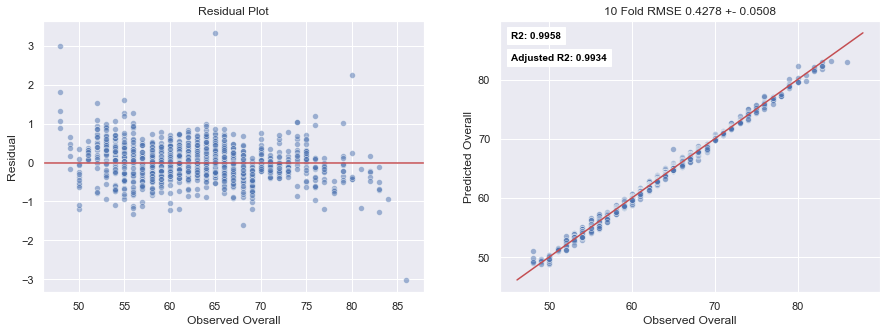

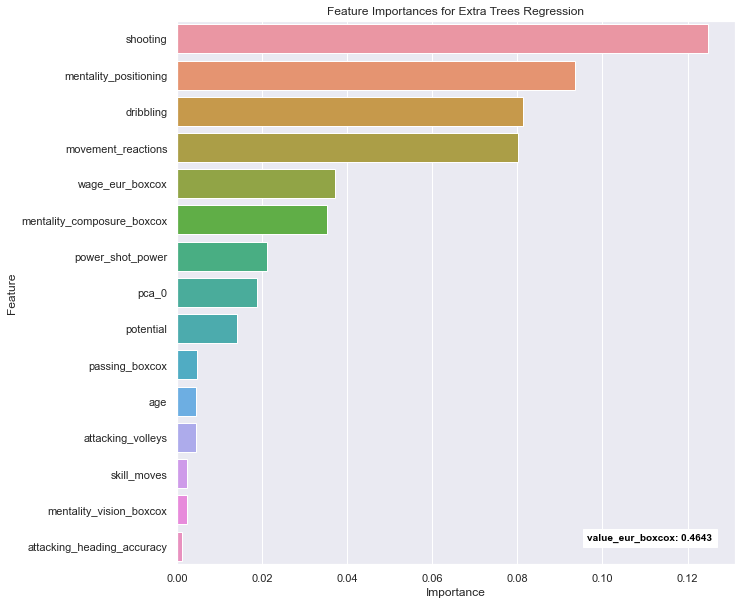

In [19]:
ext = ExtraTreesRegressor(n_estimators = 200, min_samples_split = 3, min_samples_leaf = 1,\
                           max_features = 'auto', max_depth = 90, random_state = 42, n_jobs = -1)
ext.fit(X, y)

error = rmse_cv(ext)
r2 = r2_cv(ext).mean()
y_pred = cross_val_predict(ext, X, y, cv=kfold)
predictions.append(('Extra Trees Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Importance': ext.feature_importances_ , 'Feature': X.columns }).sort_values('Importance', ascending = False)
value_eur_boxcox = coefdf.head(1)['Importance'].values
coefdf.drop(coefdf.head(1).index, inplace = True)

sns.barplot(x='Importance', y = 'Feature', data = coefdf.head(15)).set_title("Feature Importances for Extra Trees Regression")
ax.text(x=0.96, y=0.04, transform=ax.transAxes, s="value_eur_boxcox: %.4f" % value_eur_boxcox,\
    fontweight='demibold', fontsize=10, va='bottom', ha='right',\
    backgroundcolor='white', color='black')
plt.show()

While we do get performace that is slightly worse off, we see this algorithm accounts for features other than the top one more evenly. 

**Boosting Based Approaches**

Boosting approaches work on ensembles of weak learners like limited decision trees, and iteratively make them stronger based on their mistakes. This results in a strong learner when they are ensembled.

The AdaBoost algorithm uses this boosting paradigm for a weighted average of weak learners, where more weight is placed on stronger learners.

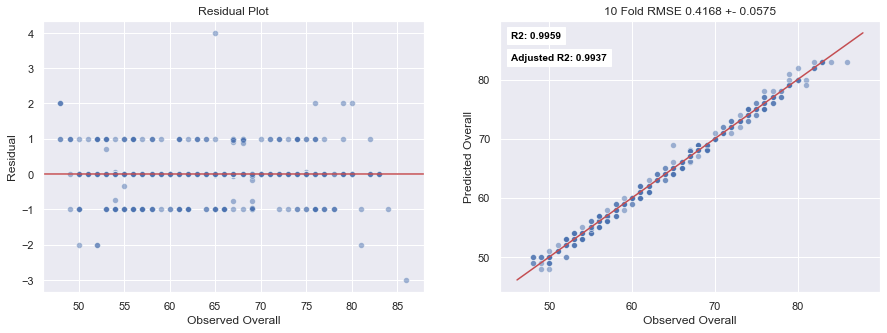

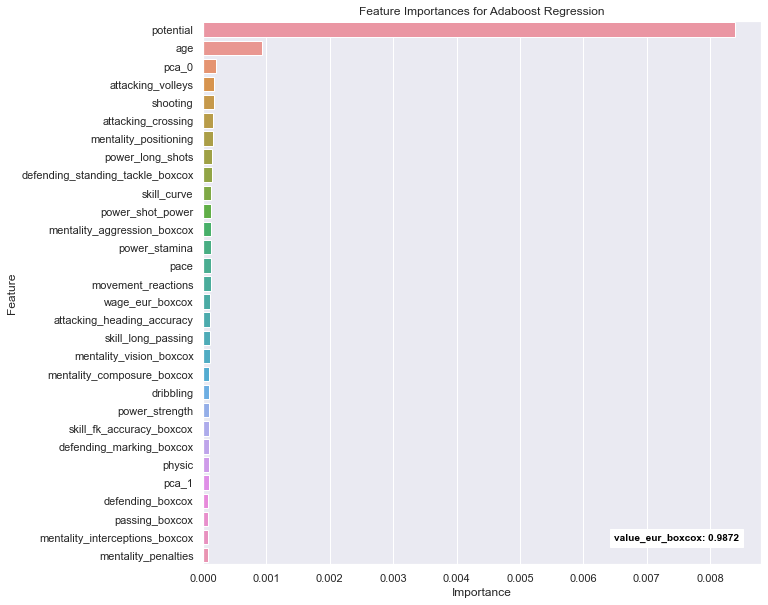

In [20]:
ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=200, learning_rate=0.01,loss='linear', random_state = 42)

ada.fit(X, y)

error = rmse_cv(ada)
r2 = r2_cv(ada).mean()
y_pred = cross_val_predict(ada, X, y, cv=kfold)
predictions.append(('Adaboost Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Importance': ada.feature_importances_ , 'Feature': X.columns }).sort_values('Importance', ascending = False)
value_eur_boxcox = coefdf.head(1)['Importance'].values
coefdf.drop(coefdf.head(1).index, inplace = True)

sns.barplot(x='Importance', y = 'Feature', data = coefdf.head(30)).set_title("Feature Importances for Adaboost Regression")
ax.text(x=0.96, y=0.04, transform=ax.transAxes, s="value_eur_boxcox: %.4f" % value_eur_boxcox,\
    fontweight='demibold', fontsize=10, va='bottom', ha='right',\
    backgroundcolor='white', color='black')
plt.show()

The performace is pretty good, though it's not beat random forests. Notice the residuals. See how they are at discrete values? I suspect the decision tree stumps we used have been too limited. This can be tuned, but I'll keep it like this. Why? Because we want a variety of models making different correct decisions and mistakes, as we'll see soon.

I must admit, the XGB or Extreme Gradient Boosting algorithm is a little frightening. This algorithm has found success in most machine learning algorithms, and if tuned properly, it can achieve incredible results. Let's check it out.

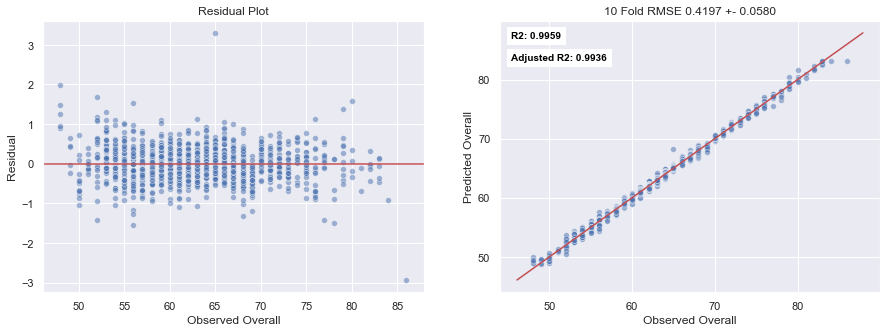

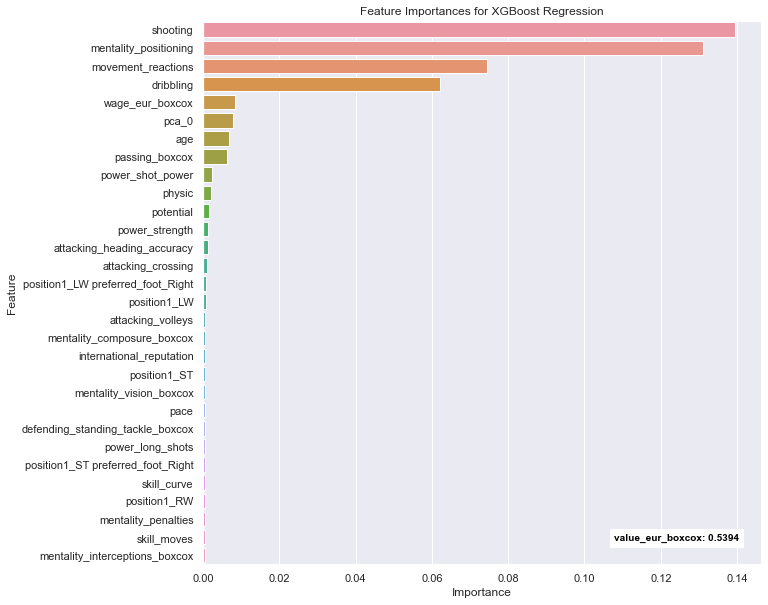

In [21]:
xgb = XGBRegressor(learning_rate=0.01,max_depth = 5, min_child_weight=0,\
                   gamma = 0.1,  subsample=0.8, colsample_bytree=0.8,\
                   n_estimators = 2000, seed = 42)

xgb.fit(X, y)

error = rmse_cv(xgb)
r2 = r2_cv(xgb).mean()
y_pred = cross_val_predict(xgb, X, y, cv=kfold)
predictions.append(('XGBoost Regression', y_pred))

n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Importance': xgb.feature_importances_ , 'Feature': X.columns }).sort_values('Importance', ascending = False)
value_eur_boxcox = coefdf.head(1)['Importance'].values
coefdf.drop(coefdf.head(1).index, inplace = True)

sns.barplot(x='Importance', y = 'Feature', data = coefdf.head(30)).set_title("Feature Importances for XGBoost Regression")
ax.text(x=0.96, y=0.04, transform=ax.transAxes, s="value_eur_boxcox: %.4f" % value_eur_boxcox,\
    fontweight='demibold', fontsize=10, va='bottom', ha='right',\
    backgroundcolor='white', color='black')
plt.show()

Not bad at all. Could be better, but we'll use this. See the feature importances? They're quite different from the other tree based models.

One last observation we can note is the very nature of all these residual plots we saw. They do not appear to have any pattern, as in linear models, and the variance appears to be more or less uniform, which is always a good sign. 

**Stacking Ensemble**

It's time for the Avengers to assemble. The concept of stacking says that we use a supervised meta learner to learn from the predictions of several base learners. The more variety in base learners, the more mistakes and strengths it can learn from, resulting in robust results. We have used KFold cross validation throughout, so we do not need a separate holdout set for this meta learner to learn.

Let's keep the predictions we made somewhere safe.

In [83]:
pickle_out = open("../data/predictions.pickle","wb")
pickle.dump(predictions, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("../data/predictions.pickle","rb")
predictions = pickle.load(pickle_in)

In [12]:
predictionsdict = dict()

for label, array in predictions:
    predictionsdict[label] = array

In [13]:
predictionsdf = pd.DataFrame(predictionsdict)

In [14]:
predictionsdf.rename(columns={'Bagging Regression': 'Bagging Support Vector Regression'} , inplace = True)
predictionsdf.drop(columns = 'Stacking Regression', inplace = True)
predictionsdf.head()

,Linear Regression,Ridge Regression,Lasso Regression,ElasticNet Regression,Support Vector Regression,Bagging Support Vector Regression,Bagging Lasso Regression,Decision Tree Regression,Random Forest Regression,Extra Trees Regression,Adaboost Regression,XGBoost Regression
0,86.717883,86.712239,86.707274,86.699263,86.669169,86.647626,86.701023,83.166667,83.128397,82.9825,83.0,82.995979
1,82.411323,82.416951,82.445343,82.458002,82.541104,82.299870,82.310464,83.500000,83.265405,83.0600,83.0,81.872429
2,83.358387,83.352352,83.342455,83.331836,83.399525,83.441534,83.439555,83.800000,82.671798,81.7275,83.0,82.995949
3,83.749436,83.745490,83.742000,83.735019,83.629022,83.817125,83.797112,83.800000,82.799756,82.5075,83.0,83.003235
4,83.131484,83.129870,83.134515,83.135659,83.172360,83.098755,83.108483,83.666667,82.978405,82.8925,83.0,82.994576


Wouldn't it be interesting to see how correlated and similar our predictions have been?

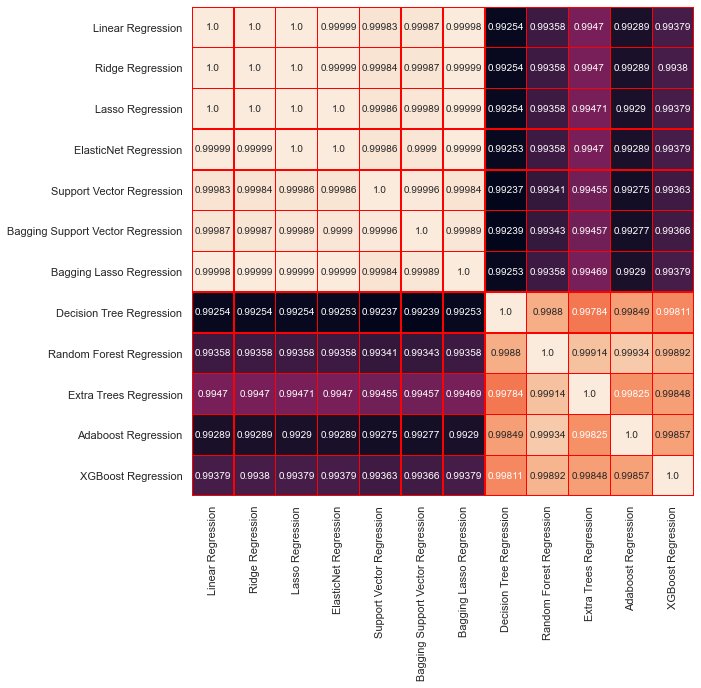

In [15]:
plt.figure(figsize = (9,9))
sns.heatmap(predictionsdf.corr(), annot = True, fmt = ".5", linecolor = "red", linewidths = 0.5, cbar = False);

As expected, the tree based and linear models are quite similar. *But* there's some dissilarities too, even between groups. Let's cross our fingers and hope our metalearner picks up on them.

In [16]:
def rmse_cv_stack(model):
    rmse= np.sqrt(-cross_val_score(model, predictionsdf, y, scoring = scorer, cv = kfold))
    return(rmse)

def r2_cv_stack(model):
    r2= cross_val_score(model, predictionsdf, y, scoring = 'r2', cv = kfold)
    return(r2)

Let's use XGBoost for the metalearner. Because why not?

In [17]:
parameters ={
  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [0, 1, 3, 5 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "gamma"            : [0, 0.5, 1],
 "n_estimators"     : [2000],
 "seed"             : [42]}

xgb = XGBRegressor()
clf = RandomizedSearchCV(xgb, param_distributions = parameters, cv = kfold ,scoring='neg_mean_squared_error', n_jobs = -1,\
                   random_state = 42, n_iter = 100, verbose = 10)

clf.fit(predictionsdf, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight...
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 

In [18]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_seed,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
72,9.620240,0.216324,0.008644,8.871792e-03,42,2000,1,8,0.05,0.5,0.5,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.5}",-0.135805,-0.110997,-0.072548,-0.133039,-0.132107,-0.259491,-0.103519,-0.147834,-0.153363,-0.103891,-0.135259,0.047379,1
51,7.054636,0.351877,0.005006,3.471997e-03,42,2000,3,8,0.05,0.5,0.4,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.4}",-0.133857,-0.108240,-0.078097,-0.121512,-0.148328,-0.251388,-0.107967,-0.169010,-0.138940,-0.103462,-0.136080,0.045549,2
67,10.617133,0.494174,0.005686,2.094753e-03,42,2000,0,12,0.05,0.5,0.4,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.4}",-0.136142,-0.110195,-0.075522,-0.119453,-0.148519,-0.253788,-0.106385,-0.158965,-0.148050,-0.103979,-0.136100,0.046047,3
68,14.207057,0.924818,0.010473,9.287198e-03,42,2000,3,12,0.05,1,0.5,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.5}",-0.136448,-0.108718,-0.073475,-0.124858,-0.133583,-0.273012,-0.110979,-0.155756,-0.140059,-0.106510,-0.136340,0.050455,4
39,12.278667,0.967480,0.003723,6.207117e-03,42,2000,3,15,0.05,0.5,0.4,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.4}",-0.135347,-0.107310,-0.080165,-0.125344,-0.154871,-0.251196,-0.108798,-0.166714,-0.139216,-0.102660,-0.137162,0.045247,5
99,13.159415,1.210335,0.005886,3.199266e-03,42,2000,0,12,0.1,1,0.5,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5}",-0.124543,-0.123964,-0.078358,-0.130825,-0.149098,-0.262334,-0.086499,-0.144412,-0.163892,-0.109229,-0.137315,0.048740,6
53,7.150615,0.230722,0.014262,1.233726e-02,42,2000,0,5,0.05,1,0.5,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.5}",-0.132615,-0.109112,-0.074596,-0.129811,-0.132428,-0.273765,-0.109604,-0.148418,-0.158871,-0.106212,-0.137543,0.050767,7
98,7.424649,0.092836,0.007182,7.748726e-03,42,2000,0,6,0.1,1,0.5,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5}",-0.124759,-0.123791,-0.077248,-0.133548,-0.148870,-0.265467,-0.085928,-0.142527,-0.165023,-0.109712,-0.137687,0.049715,8
52,8.151507,0.258277,0.008911,9.422363e-03,42,2000,3,6,0.1,1,0.5,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5}",-0.124903,-0.125336,-0.078637,-0.136103,-0.152442,-0.263738,-0.087595,-0.153641,-0.147136,-0.110113,-0.137964,0.048502,9
4,8.481607,0.446143,0.007753,8.115680e-03,42,2000,3,10,0.1,0.5,0.5,"{'seed': 42, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.5}",-0.128607,-0.129513,-0.076268,-0.140849,-0.151658,-0.244245,-0.086647,-0.162986,-0.153681,-0.108146,-0.138260,0.044555,10


In [20]:
parameters ={
 "learning_rate"    : [0.01, 0.03, 0.05, 0.1 ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [0, 1, 2, 3 ],
 "subsample"        : [ 0.3, 0.4, 0.5 ,0.6, 0.7 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 ,0.6, 0.7 ],
 "gamma"            : [0.5, 0.75, 1],
 "n_estimators"     : [2000],
 "seed"             : [42]}

xgb = XGBRegressor()
clf = RandomizedSearchCV(xgb, param_distributions = parameters, cv = kfold ,scoring='neg_mean_squared_error', n_jobs = -1,\
                   random_state = 42, n_iter = 100, verbose = 10)

clf.fit(predictionsdf, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  5

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.5, 0.75, 1],
                                        'le

In [21]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_seed,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
62,8.419897,0.149509,0.032805,0.016310,0.5,42,2000,0,10,0.01,0.5,0.5,"{'subsample': 0.5, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.5}",-0.119408,-0.130523,-0.079796,-0.120104,-0.118466,-0.244261,-0.112076,-0.135199,-0.151677,-0.096947,-0.130846,0.042217,1
12,4.463055,0.195798,0.022242,0.009731,0.6,42,2000,0,5,0.01,0.5,0.4,"{'subsample': 0.6, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.4}",-0.118325,-0.130755,-0.082255,-0.119509,-0.113135,-0.248938,-0.111248,-0.143796,-0.145527,-0.102814,-0.131630,0.042957,2
98,10.929718,0.846738,0.027658,0.010772,0.5,42,2000,0,8,0.01,0.5,0.7,"{'subsample': 0.5, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.7}",-0.117132,-0.130804,-0.082612,-0.121020,-0.129296,-0.245264,-0.112793,-0.132755,-0.154673,-0.096097,-0.132245,0.042178,3
44,5.654338,0.073547,0.026160,0.013899,0.5,42,2000,0,5,0.01,0.5,0.6,"{'subsample': 0.5, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.6}",-0.119910,-0.128242,-0.082859,-0.119959,-0.121620,-0.250162,-0.112878,-0.132769,-0.154618,-0.100520,-0.132354,0.043195,4
1,10.864932,0.350219,0.017719,0.014625,0.4,42,2000,0,12,0.03,0.5,0.6,"{'subsample': 0.4, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 12, 'learning_rate': 0.03, 'gamma': 0.5, 'colsample_bytree': 0.6}",-0.117499,-0.133532,-0.094670,-0.119327,-0.139722,-0.234321,-0.117109,-0.114374,-0.153025,-0.100644,-0.132422,0.037752,5
0,4.504049,0.283155,0.020944,0.012765,0.6,42,2000,2,5,0.01,0.5,0.3,"{'subsample': 0.6, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.3}",-0.120871,-0.134316,-0.080697,-0.132958,-0.111574,-0.245470,-0.114571,-0.140124,-0.142456,-0.105454,-0.132849,0.041511,6
73,6.029696,0.122042,0.014060,0.008413,0.7,42,2000,0,8,0.01,1,0.4,"{'subsample': 0.7, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 0, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.4}",-0.124398,-0.122185,-0.079662,-0.124656,-0.116176,-0.259096,-0.112006,-0.135961,-0.149568,-0.104938,-0.132865,0.045607,7
14,7.260211,0.976212,0.016722,0.011134,0.5,42,2000,2,5,0.01,1,0.7,"{'subsample': 0.5, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.7}",-0.116041,-0.125737,-0.080734,-0.125663,-0.126971,-0.264334,-0.112691,-0.132329,-0.149205,-0.097616,-0.133132,0.047263,8
47,8.383657,0.141107,0.019379,0.010080,0.5,42,2000,2,15,0.01,1,0.4,"{'subsample': 0.5, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 2, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.4}",-0.111672,-0.133864,-0.082847,-0.136442,-0.112202,-0.257720,-0.112896,-0.131280,-0.152870,-0.101836,-0.133363,0.045544,9
23,7.412855,0.567287,0.022240,0.016267,0.5,42,2000,3,10,0.01,1,0.4,"{'subsample': 0.5, 'seed': 42, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.4}",-0.111142,-0.131810,-0.084052,-0.135149,-0.112910,-0.259956,-0.110539,-0.132585,-0.153622,-0.103170,-0.133493,0.046064,10


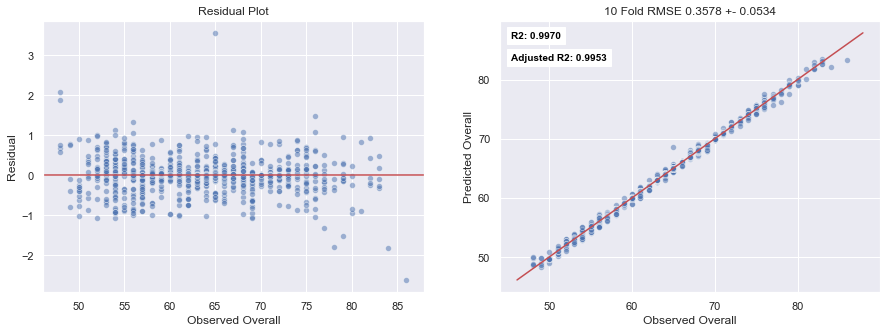

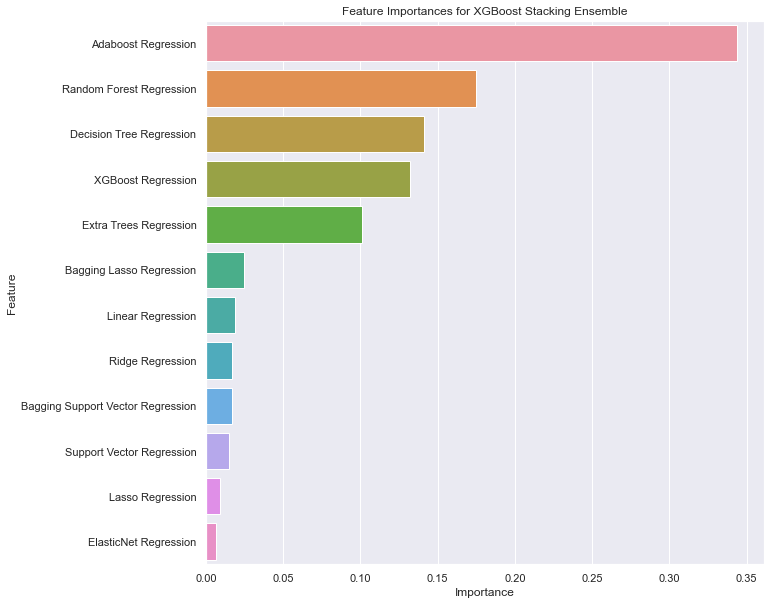

In [22]:
xgb = XGBRegressor(seed = 42, n_estimators = 2000, min_child_weight = 0, max_depth = 10,\
                  learning_rate = 0.01, gamma = 0.5, colsample_bytree = 0.5, subsample = 0.5)

xgb.fit(predictionsdf, y)

error = rmse_cv_stack(xgb)
r2 = r2_cv_stack(xgb).mean()
y_pred = cross_val_predict(xgb, predictionsdf, y, cv=kfold)


n = X.shape[0] // 10
p = X.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


y_pred = pd.Series(y_pred)
ydf = pd.DataFrame({'Observed Overall': y, 'Predicted Overall': y_pred})
ydf["Residual"] = ydf["Predicted Overall"] - ydf["Observed Overall"]


f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 10))

coefdf = pd.DataFrame( {'Importance': xgb.feature_importances_ , 'Feature': predictionsdf.columns }).sort_values('Importance', ascending = False)

sns.barplot(x='Importance', y = 'Feature', data = coefdf.head(30)).set_title("Feature Importances for XGBoost Stacking Ensemble")
plt.show()

Here we have it. Our best results yet. Check out the feature importances! Adaboost is the best? Seriously? Wow.

Alright so here's what I think. Adaboost was much less correlated to the other tree based models. Hence it provided a *LOT* of complementary information, as opposed to Random Forest and let's say, Extra Trees. These were pretty similar, and cumulatively, their importance is more than Adaboost.

In [28]:
predictionsdf.rename(columns={
                                'Linear Regression' : 'Linear Regression RMSE 0.7408',
                                'Ridge Regression' : 'Ridge Regression RMSE 0.7407',
                                'Lasso Regression' : 'Lasso Regression RMSE 0.7406',
                                'ElasticNet Regression' : 'ElasticNet Regression RMSE 0.7408',
                                'Support Vector Regression' : 'Support Vector Regression RMSE 0.7475',
                                'Bagging Support Vector Regression' : 'Bagging Support Vector Regression RMSE 0.7481',
                                'Bagging Lasso Regression': 'Bagging Lasso Regression RMSE 0.7408',
                                'Decision Tree Regression' : 'Decision Tree Regression RMSE 0.4660',
                                'Random Forest Regression' : 'Random Forest Regression RMSE 0.3818',
                                'Extra Trees Regression' : 'Extra Trees Regression RMSE 0.4278',
                                'Adaboost Regression' : 'Adaboost Regression RMSe 0.4168',
                                'XGBoost Regression' : 'XGBoost Regression RMSE 0.4197',

                                } , inplace = True)

In [29]:
predictionsdf.head()

,Linear Regression RMSE 0.7408,Ridge Regression RMSE 0.7407,Lasso Regression RMSE 0.7406,ElasticNet Regression RMSE 0.7408,Support Vector Regression RMSE 0.7475,Bagging Support Vector Regression RMSE 0.7481,Bagging Lasso Regression RMSE 0.7408,Decision Tree Regression RMSE 0.4660,Random Forest Regression RMSE 0.3818,Extra Trees Regression RMSE 0.4278,Adaboost Regression RMSe 0.4168,XGBoost Regression RMSE 0.4197
0,86.717883,86.712239,86.707274,86.699263,86.669169,86.647626,86.701023,83.166667,83.128397,82.9825,83.0,82.995979
1,82.411323,82.416951,82.445343,82.458002,82.541104,82.299870,82.310464,83.500000,83.265405,83.0600,83.0,81.872429
2,83.358387,83.352352,83.342455,83.331836,83.399525,83.441534,83.439555,83.800000,82.671798,81.7275,83.0,82.995949
3,83.749436,83.745490,83.742000,83.735019,83.629022,83.817125,83.797112,83.800000,82.799756,82.5075,83.0,83.003235
4,83.131484,83.129870,83.134515,83.135659,83.172360,83.098755,83.108483,83.666667,82.978405,82.8925,83.0,82.994576


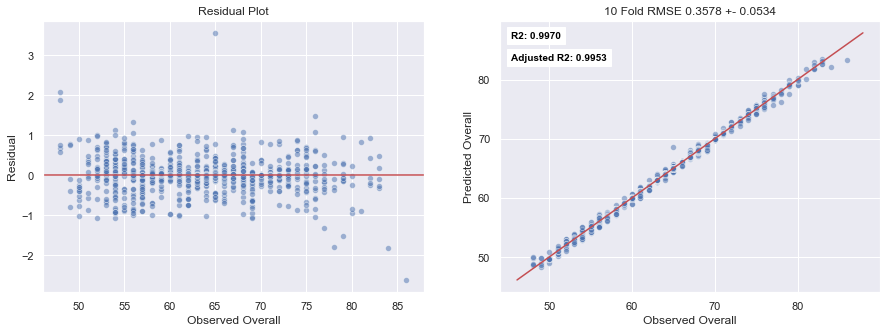

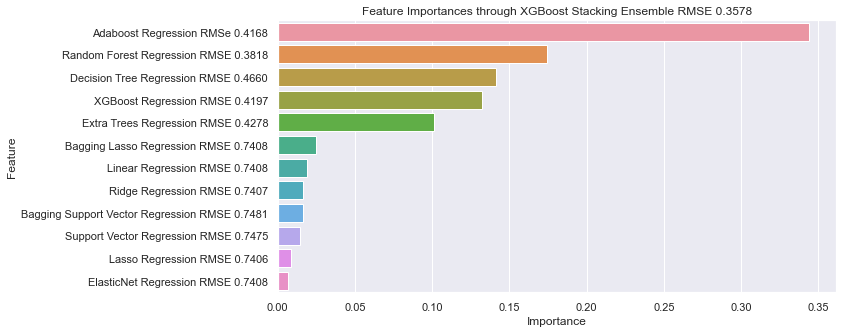

In [31]:
f, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 5))

sns.scatterplot(x="Observed Overall", y="Residual", alpha = 0.5, data = ydf, ax = ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title("Residual Plot")
sns.scatterplot(x="Observed Overall", y="Predicted Overall", alpha = 0.5, data = ydf, ax = ax[1])
x = np.linspace(*ax[1].get_xlim())
ax[1].plot(x, x, color='r')
ax[1].text(x=0.03, y=0.96, transform=ax[1].transAxes, s="R2: %.4f" % r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].text(x=0.03, y=0.88, transform=ax[1].transAxes, s="Adjusted R2: %.4f" % adj_r2,\
    fontweight='demibold', fontsize=10, va='top', ha='left',\
    backgroundcolor='white', color='black')
ax[1].set_title("10 Fold RMSE {mean:.4f} +- {std:.4f}".format(mean = error.mean(), std = error.std()))
plt.show()

f, ax = plt.subplots(1, 1, sharey=False, figsize=(10, 5))

coefdf = pd.DataFrame( {'Importance': xgb.feature_importances_ , 'Feature': predictionsdf.columns }).sort_values('Importance', ascending = False)

sns.barplot(x='Importance', y = 'Feature', data = coefdf.head(30)).set_title("Feature Importances through XGBoost Stacking Ensemble RMSE 0.3578")
plt.show()

A really low RMSE, and a sweet adjusted R2 almost equal to 1, with the residual plot looking pretty standard for a good regression fit (I see a couple of outliers though).

**Error Analysis**

In [51]:
(ydf[ydf['Residual'] >= 1.5] )


,Observed Overall,Predicted Overall,Residual
539,65.0,68.552406,3.552406
1410,48.0,49.867062,1.867062
1413,48.0,50.062569,2.062569


In [52]:
dflr.loc[[539, 1410, 1413, ],:]

,age,overall,potential,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,dribbling,physic,attacking_crossing,attacking_heading_accuracy,attacking_volleys,skill_curve,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_stamina,power_strength,power_long_shots,mentality_positioning,mentality_penalties,mentality_composure_boxcox,passing_boxcox,mentality_vision_boxcox,value_eur_boxcox,wage_eur_boxcox,skill_fk_accuracy_boxcox,defending_boxcox,mentality_aggression_boxcox,defending_marking_boxcox,mentality_interceptions_boxcox,defending_standing_tackle_boxcox,pca_0,pca_1,position1_RW position2_ LW,position1_LW,position1_LW position2_ RW,position2_ LW,position1_LW preferred_foot_Right,position1_RW preferred_foot_Left,position1_RW,position2_ LW preferred_foot_Right,position2_ ST,position1_ST preferred_foot_Right,position1_ST,position1_ST position2_NA,position2_NA preferred_foot_Right,position2_NA
539,23.0,65.0,73.0,1.0,3.0,2.0,1.0,65.0,67.0,59.0,52.0,29.0,72.0,57.0,49.0,49.0,58.0,60.0,66.0,77.0,47.0,65.0,68.0,68.0,2.272660,3.434127,2.374772,24.118198,8.328670,1.541773,1.552626,2.536852,2.910401,1.734379,2.331214,-0.305586,1.315717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1410,20.0,48.0,65.0,1.0,3.0,2.0,1.0,58.0,43.0,49.0,48.0,26.0,46.0,33.0,34.0,35.0,48.0,46.0,45.0,50.0,53.0,39.0,44.0,45.0,2.246493,3.184321,2.252049,16.543908,7.442015,1.557061,1.592831,2.683612,3.291489,2.067122,2.504251,-3.576880,-1.507677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1413,19.0,48.0,64.0,1.0,3.0,2.0,1.0,62.0,49.0,49.0,44.0,45.0,32.0,42.0,41.0,30.0,53.0,36.0,65.0,40.0,51.0,34.0,49.0,51.0,2.232241,3.310083,2.294544,16.221727,6.776922,1.578163,1.526232,2.615768,2.638192,1.834405,2.482986,-2.603893,-1.338542,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


For the two players with overall 48, we can consider them outlier values, as the fall at the very bottom of the spectrum.

Let's see how the player with 65 differs from the others with overall 65.

In [58]:
(dflr - dflr.loc[dflr['overall'] == 65, :].mean() ).loc[[539],:]

,age,overall,potential,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,dribbling,physic,attacking_crossing,attacking_heading_accuracy,attacking_volleys,skill_curve,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_stamina,power_strength,power_long_shots,mentality_positioning,mentality_penalties,mentality_composure_boxcox,passing_boxcox,mentality_vision_boxcox,value_eur_boxcox,wage_eur_boxcox,skill_fk_accuracy_boxcox,defending_boxcox,mentality_aggression_boxcox,defending_marking_boxcox,mentality_interceptions_boxcox,defending_standing_tackle_boxcox,pca_0,pca_1,position1_RW position2_ LW,position1_LW,position1_LW position2_ RW,position2_ LW,position1_LW preferred_foot_Right,position1_RW preferred_foot_Left,position1_RW,position2_ LW preferred_foot_Right,position2_ ST,position1_ST preferred_foot_Right,position1_ST,position1_ST position2_NA,position2_NA preferred_foot_Right,position2_NA
539,2.0,0.0,-2.6875,0.0,-0.1125,-0.6375,-0.4,-7.65,4.7625,-6.775,-6.125,-19.8375,14.525,2.6375,-3.1625,2.6625,-12.55,1.75,1.6,15.25,-14.075,6.9,4.75,7.9,-0.045013,-0.071951,0.003944,1.652223,0.521123,-0.047925,-0.029836,-0.258912,-0.291418,-0.252194,-0.102285,-0.568266,1.113318,-0.0625,-0.2,-0.1,-0.1,-0.0875,-0.0625,-0.1625,-0.0625,-0.0875,0.525,0.3875,-0.525,-0.4875,-0.6625


Attacking crossing was always in the top few important features, and we see quite a big deviation from the norm for this guy.

In [63]:
(ydf[ydf['Residual'] <= -1.5] )

,Observed Overall,Predicted Overall,Residual
0,86.0,83.374504,-2.625496
1,84.0,82.171112,-1.828888
23,79.0,77.478577,-1.521423
30,78.0,76.200485,-1.799515


In [64]:
dflr.loc[[0,1,23,30 ],:]

,age,overall,potential,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,dribbling,physic,attacking_crossing,attacking_heading_accuracy,attacking_volleys,skill_curve,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_stamina,power_strength,power_long_shots,mentality_positioning,mentality_penalties,mentality_composure_boxcox,passing_boxcox,mentality_vision_boxcox,value_eur_boxcox,wage_eur_boxcox,skill_fk_accuracy_boxcox,defending_boxcox,mentality_aggression_boxcox,defending_marking_boxcox,mentality_interceptions_boxcox,defending_standing_tackle_boxcox,pca_0,pca_1,position1_RW position2_ LW,position1_LW,position1_LW position2_ RW,position2_ LW,position1_LW preferred_foot_Right,position1_RW preferred_foot_Left,position1_RW,position2_ LW preferred_foot_Right,position2_ ST,position1_ST preferred_foot_Right,position1_ST,position1_ST position2_NA,position2_NA preferred_foot_Right,position2_NA
0,23.0,86.0,92.0,2.0,3.0,4.0,2.0,95.0,81.0,86.0,70.0,83.0,72.0,85.0,83.0,64.0,86.0,81.0,87.0,78.0,70.0,78.0,84.0,71.0,2.410697,3.818192,2.493413,34.510595,11.774935,1.668340,1.630620,2.977260,3.461875,2.147455,2.598257,4.767432,1.083064,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,22.0,84.0,90.0,3.0,5.0,5.0,2.0,93.0,79.0,87.0,57.0,84.0,43.0,76.0,82.0,76.0,89.0,78.0,83.0,69.0,52.0,78.0,78.0,75.0,2.417117,3.827732,2.479295,33.333624,11.774935,1.644323,1.622383,2.915134,3.605466,2.166503,2.562876,4.659280,1.071539,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,20.0,79.0,86.0,3.0,4.0,4.0,1.0,90.0,68.0,84.0,58.0,69.0,40.0,70.0,69.0,59.0,87.0,77.0,77.0,77.0,51.0,58.0,73.0,61.0,2.371207,3.726066,2.464212,30.646496,10.997496,1.633846,1.622383,2.819823,3.512287,2.137371,2.598257,3.330501,-0.043026,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,20.0,78.0,85.0,3.0,2.0,5.0,1.0,74.0,69.0,85.0,49.0,86.0,52.0,68.0,78.0,76.0,78.0,74.0,76.0,72.0,40.0,75.0,62.0,63.0,2.404064,3.846439,2.500143,29.994061,9.845112,1.664932,1.638222,2.770032,3.512287,2.257429,2.646725,1.690463,1.232291,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The top two are also outliers.

In [65]:
(dflr - dflr.loc[dflr['overall'] == 79, :].mean() ).loc[[23],:]

,age,overall,potential,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,dribbling,physic,attacking_crossing,attacking_heading_accuracy,attacking_volleys,skill_curve,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_stamina,power_strength,power_long_shots,mentality_positioning,mentality_penalties,mentality_composure_boxcox,passing_boxcox,mentality_vision_boxcox,value_eur_boxcox,wage_eur_boxcox,skill_fk_accuracy_boxcox,defending_boxcox,mentality_aggression_boxcox,defending_marking_boxcox,mentality_interceptions_boxcox,defending_standing_tackle_boxcox,pca_0,pca_1,position1_RW position2_ LW,position1_LW,position1_LW position2_ RW,position2_ LW,position1_LW preferred_foot_Right,position1_RW preferred_foot_Left,position1_RW,position2_ LW preferred_foot_Right,position2_ ST,position1_ST preferred_foot_Right,position1_ST,position1_ST position2_NA,position2_NA preferred_foot_Right,position2_NA
23,-1.7,0.0,0.1,1.3,0.5,0.0,-0.8,3.1,-5.8,2.5,-10.4,-0.3,-16.5,-1.1,-3.4,-5.8,2.9,-0.7,-2.5,-1.7,-15.5,-13.3,-3.9,-5.8,-0.024412,-0.00772,0.006254,0.009572,0.822389,0.00503,-0.006362,-0.135794,-0.061845,-0.002224,-0.006705,0.116829,-0.696629,-0.2,0.7,0.9,-0.2,0.7,-0.1,-0.4,-0.1,-0.1,-0.2,-0.3,-0.2,-0.3,-0.3


This player underperformed in shooting, an important attribute.

In [66]:
(dflr - dflr.loc[dflr['overall'] == 78, :].mean() ).loc[[30],:]

,age,overall,potential,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,dribbling,physic,attacking_crossing,attacking_heading_accuracy,attacking_volleys,skill_curve,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_stamina,power_strength,power_long_shots,mentality_positioning,mentality_penalties,mentality_composure_boxcox,passing_boxcox,mentality_vision_boxcox,value_eur_boxcox,wage_eur_boxcox,skill_fk_accuracy_boxcox,defending_boxcox,mentality_aggression_boxcox,defending_marking_boxcox,mentality_interceptions_boxcox,defending_standing_tackle_boxcox,pca_0,pca_1,position1_RW position2_ LW,position1_LW,position1_LW position2_ RW,position2_ LW,position1_LW preferred_foot_Right,position1_RW preferred_foot_Left,position1_RW,position2_ LW preferred_foot_Right,position2_ ST,position1_ST preferred_foot_Right,position1_ST,position1_ST position2_NA,position2_NA preferred_foot_Right,position2_NA
30,-1.6,0.0,0.6,1.4,-1.0,1.4,-0.6,-6.6,-4.4,5.2,-15.6,22.8,-13.8,-2.4,9.8,14.6,0.2,1.0,-1.6,1.6,-25.0,5.4,-12.2,-3.2,0.023427,0.152253,0.052396,-0.017669,-0.353066,0.042304,0.003136,-0.115463,0.078007,0.081641,-0.027632,-0.757033,-0.018321,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.0,-0.2,-0.4,-0.4,-0.4,-0.4,0.2


Quite a big deviation in pace here!

**Final Words**

That was quite the journey, and a fun one at that! We ended up with some pretty impressive results too. Analysis of attributes is quite important for football manager simulations such as FIFA career mode and ultimate team. Estimates are drawn from real world scouting observations, so some insights into what makes a player good at their job can also be drawn from here. If you have any suggestions, comments, or corrections please do let me know! 